In [1]:
import pandas as pd
import numpy as np
import os
import random
df=pd.read_csv('/home/ishaan/Machine-Learning/datasets/synth.tr.csv')
del df['Unnamed: 0']
target_variable=df.ix[:,2]
df=df.ix[:,0:2]
print df.head(10)


         xs        ys
0  0.051008  0.160862
1 -0.748074  0.089040
2 -0.772934  0.263172
3  0.218374  0.127061
4  0.372683  0.496562
5 -0.629315  0.632022
6 -0.433072  0.144792
7 -0.841520 -0.191313
8  0.475256  0.224837
9  0.320830  0.327213


In [2]:
#k=2 binary classification
num_clusters=2
cluster_list=random.sample(range(1, df.shape[0]), num_clusters)
dic={}
for i in range(0,len(cluster_list)):
    dic[cluster_list[i]]=i
print dic


{33: 1, 126: 0}


In [3]:
centroids=pd.DataFrame(np.random.randn(len(dic), df.shape[1]))

In [4]:
for i in range(len(dic)):
    for j in range(df.shape[1]):
        centroids.loc[i,j]=df.iloc[dic.keys()[i]][j]

In [7]:
import math
num_iter=10
df["clusters"]=0
m=df.shape[1]
for i in range(num_iter):
    for j in range(df.shape[0]):
        euclidian_distance=random.sample(range(0, num_clusters), num_clusters)
        for k in range(0,centroids.shape[0]):
            dt=0
            for l in range(0,centroids.shape[1]):
                dt=dt+(df.iloc[j][l]-centroids.iloc[k][l])*(df.iloc[j][l]-centroids.iloc[k][l])
            euclidian_distance[k]=math.sqrt(dt)
        df.loc[j,m-1]=euclidian_distance.index(min(euclidian_distance))
    #recalculate centroids
    for p in range(0,centroids.shape[0]):
        for q in range(0,centroids.shape[1]):
            centroids.loc[p,q]
            su=0
            cnt=0
            for r in range(0,df.shape[0]):
                if(df.iloc[r][m-1]==p):
                    su=su+df.iloc[r][q]
                    cnt=cnt+1
            centroids.loc[p,q]=(su*1.0)/cnt
            
                
            
                
            
    

In [8]:
print df.head(10)

         xs        ys  clusters    2
0  0.051008  0.160862         0  1.0
1 -0.748074  0.089040         0  0.0
2 -0.772934  0.263172         0  0.0
3  0.218374  0.127061         0  1.0
4  0.372683  0.496562         0  1.0
5 -0.629315  0.632022         0  0.0
6 -0.433072  0.144792         0  0.0
7 -0.841520 -0.191313         0  0.0
8  0.475256  0.224837         0  1.0
9  0.320830  0.327213         0  1.0


In [9]:
del df['clusters']
df.columns=['xs','ys','clusters']

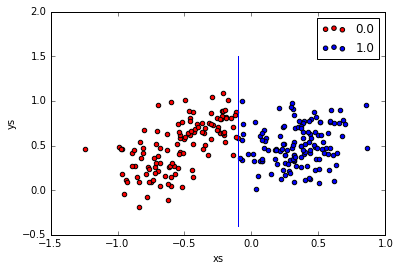

In [17]:
import matplotlib.pyplot as plt
from random import *
%matplotlib inline
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
grouped = df.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='xs', y='ys', label=key, color=colors[key])
plt.plot([-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1], [1.5,1.2,1,0.8,0.6,-0.2,-0.4])
plt.show()

In [13]:
print "similar points are clustered together,seems like a nice decision boundary"


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
220    1
221    1
222    1
223    1
224    1
225    1
226    1
227    1
228    1
229    1
230    1
231    1
232    1
233    1
234    1
235    1
236    1
237    1
238    1
239    1
240    1
241    1
242    1
243    1
244    1
245    1
246    1
247    1
248    1
249    1
Name: yc, dtype: int64


In [14]:
X_plot = np.linspace(0,1,100)
print type(X_plot)

<type 'numpy.ndarray'>
